**IMDb Database Comprehensive Exploratory Data Analysis Example**

Kaggle Dataset: https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction?select=movies.csv

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 1: Dealing with Missing Values and Data Preprocessing**

In [2]:
# importing dataset
df = pd.read_csv('movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


**Dataset Description**
1. Movies: Names of titles listed on IMDb - not necessarily movies
2. Year: Contains year of release (for movies) or runtime (for shows); also contains information about special forms of media for other media types
3. Genre: List of genres of the title
4. Rating: Average User-Rating for the title on IMDb
5. One-line: One-line description of the title as provided by IMDb
6. Votes: Number of User-Ratings provided for the Rating value
7. RunTime: Runtime of the title in minutes
8. Gross: Total revenue earned by the title in worldwide sales

In [3]:
# dropping rows with no rating information
df = df.dropna(subset=['RATING'])
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8179 non-null   object 
 1   YEAR      8179 non-null   object 
 2   GENRE     8168 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  8179 non-null   object 
 5   STARS     8179 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   6786 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 575.2+ KB


In [4]:
# dropping RunTime and Gross column due to insufficient data
df = df.drop(['RunTime', 'Gross'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8179 non-null   object 
 1   YEAR      8179 non-null   object 
 2   GENRE     8168 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  8179 non-null   object 
 5   STARS     8179 non-null   object 
 6   VOTES     8179 non-null   object 
dtypes: float64(1), object(6)
memory usage: 447.4+ KB


In [5]:
# dropping One-Line due to lack of relevance
df = df.drop(['ONE-LINE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOVIES  8179 non-null   object 
 1   YEAR    8179 non-null   object 
 2   GENRE   8168 non-null   object 
 3   RATING  8179 non-null   float64
 4   STARS   8179 non-null   object 
 5   VOTES   8179 non-null   object 
dtypes: float64(1), object(5)
memory usage: 383.5+ KB


In [6]:
# cleaning Genre series by replacing missing genres with empty strings
df['GENRE'].unique()

array(['\nAction, Horror, Thriller            ',
       '\nAnimation, Action, Adventure            ',
       '\nDrama, Horror, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nAction, Crime, Drama            ',
       '\nDrama, Romance            ',
       '\nCrime, Drama, Mystery            ', '\nComedy            ',
       '\nAction, Adventure, Thriller            ',
       '\nCrime, Drama, Fantasy            ',
       '\nDrama, Horror, Mystery            ',
       '\nComedy, Drama, Romance            ',
       '\nCrime, Drama, Thriller            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nDrama, Fantasy, Horror            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Drama            ',
       '\nCrime, Drama            ',
       '\nDrama, History, Romance            ',
       '\nHorror, Mystery            ', '\nComedy, Crime            ',
       '\nAction, Drama, History            ',
    

In [7]:
df['GENRE'] = df['GENRE'].replace([float("nan")], '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOVIES  8179 non-null   object 
 1   YEAR    8179 non-null   object 
 2   GENRE   8179 non-null   object 
 3   RATING  8179 non-null   float64
 4   STARS   8179 non-null   object 
 5   VOTES   8179 non-null   object 
dtypes: float64(1), object(5)
memory usage: 383.5+ KB


In [8]:
# splitting Genres into lists of individual values
genres = []
for i, a in df['GENRE'].items():
    genreList = a.replace("\n", "").split(", ")
    for i in range(len(genreList)): genreList[i] = genreList[i].strip() 
    genres.append(genreList)
print(len(genres))
print(genres)

8179
[['Action', 'Horror', 'Thriller'], ['Animation', 'Action', 'Adventure'], ['Drama', 'Horror', 'Thriller'], ['Animation', 'Adventure', 'Comedy'], ['Action', 'Crime', 'Drama'], ['Drama', 'Romance'], ['Crime', 'Drama', 'Mystery'], ['Comedy'], ['Drama', 'Romance'], ['Action', 'Adventure', 'Thriller'], ['Crime', 'Drama', 'Fantasy'], ['Drama', 'Horror', 'Mystery'], ['Comedy', 'Drama', 'Romance'], ['Drama', 'Horror', 'Thriller'], ['Drama', 'Romance'], ['Crime', 'Drama', 'Thriller'], ['Drama'], ['Comedy', 'Drama'], ['Drama', 'Fantasy', 'Horror'], ['Drama', 'Horror', 'Mystery'], ['Comedy', 'Romance'], ['Action', 'Adventure', 'Drama'], ['Crime', 'Drama'], ['Drama', 'History', 'Romance'], ['Action', 'Adventure', 'Drama'], ['Crime', 'Drama'], ['Drama', 'Fantasy', 'Horror'], ['Crime', 'Drama', 'Mystery'], ['Horror', 'Mystery'], ['Crime', 'Drama'], ['Comedy', 'Crime'], ['Action', 'Crime', 'Drama'], ['Action', 'Drama', 'History'], ['Comedy', 'Drama', 'Romance'], ['Action', 'Adventure', 'Crime'], 

In [9]:
df['GENRE'] = genres
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOVIES  8179 non-null   object 
 1   YEAR    8179 non-null   object 
 2   GENRE   8179 non-null   object 
 3   RATING  8179 non-null   float64
 4   STARS   8179 non-null   object 
 5   VOTES   8179 non-null   object 
dtypes: float64(1), object(5)
memory usage: 383.5+ KB


In [10]:
# cleaning up Stars series
df['STARS'].unique()

array(['\n    Director:\nPeter Thorwarth\n| \n    Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n',
       '\n            \n    Stars:\nChris Wood, \nSarah Michelle Gellar, \nLena Headey, \nMark Hamill\n',
       '\n            \n    Stars:\nAndrew Lincoln, \nNorman Reedus, \nMelissa McBride, \nLauren Cohan\n',
       ...,
       '\n    Directors:\nDominique Boidin, \nLéon Bérelle, \nRémi Kozyra, \nMaxime Luère\n| \n    Stars:\nPeter Franzén, \nZita Hanrot, \nAlaïs Lawson, \nJonnie Hurn\n',
       '\n    Director:\nKalina Alabrudzinska\n| \n    Stars:\nAleksandra Skraba, \nMaria Sobocinska, \nSandra Drzymalska, \nPiotr Pacek\n',
       '\n    Director:\nLang Fisher\n| \n    Stars:\nMaitreyi Ramakrishnan, \nRicha Moorjani, \nJaren Lewison, \nDarren Barnet\n'],
      dtype=object)

In [11]:
# splitting Stars into two new columns
directors = []
stars = []
for i, a in df['STARS'].items():
    if 'Directors' in a: 
        directors.append(a[a.find('Directors:') + 10 : a.find('|')].replace("\n", "").split(", "))
    elif 'Director' in a:
        directors.append([a[a.find('Director:') + 9 : a.find('|')].replace("\n", "")])
    else: directors.append([])
    if 'Stars' in a:
        if a.rfind("|") < a.find('Stars:'): stars.append(a[a.find('Stars:') + 6:].replace("\n", "").split(", "))
        else: stars.append(a[a.find('Stars:') + 6 : a.find('|')].replace("\n", "").split(", "))
    elif 'Star' in a:
        if a.rfind("|") < a.find('Stars:'): stars.append([a[a.find('Star:') + 5:].replace("\n", "")])
        else: stars.append([a[a.find('Star:') + 5 : a.find('|')].replace("\n", "")])
    else: stars.append([])
print(len(directors))
print(len(stars))

8179
8179


In [12]:
df['DIRECTORS'] = directors
df['STARS'] = stars
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MOVIES     8179 non-null   object 
 1   YEAR       8179 non-null   object 
 2   GENRE      8179 non-null   object 
 3   RATING     8179 non-null   float64
 4   STARS      8179 non-null   object 
 5   VOTES      8179 non-null   object 
 6   DIRECTORS  8179 non-null   object 
dtypes: float64(1), object(6)
memory usage: 447.4+ KB


In [13]:
# adding TV Show/Movie classification
df['YEAR'].value_counts()

(2020– )       747
(2020)         625
(2019)         540
(2019– )       437
(2018)         393
              ... 
(1988–1999)      1
(2010–2012)      1
(1941)           1
(1992–1995)      1
(1985– )         1
Name: YEAR, Length: 408, dtype: int64

In [14]:
# classifying based on Year features
mediaType = []
allowed = '()–1234567890IVX '
for i, a in df['YEAR'].items():
    if(not all(char in allowed for char in a)):
        a = a[a.rfind('('):]
        mediaType.append(a[6:-1])
    elif("–" in a): mediaType.append('TV Series')
        # note: this is not the regular hyphen in the keyboard; this dataset uses another character
    else: mediaType.append('Movie')
print(len(mediaType))
print(mediaType)

8179
['Movie', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'Movie', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'Movie', 'TV Series', 'TV Series', 'TV Series', 'TV Series', 'TV Series

In [15]:
df['MEDIA'] = mediaType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MOVIES     8179 non-null   object 
 1   YEAR       8179 non-null   object 
 2   GENRE      8179 non-null   object 
 3   RATING     8179 non-null   float64
 4   STARS      8179 non-null   object 
 5   VOTES      8179 non-null   object 
 6   DIRECTORS  8179 non-null   object 
 7   MEDIA      8179 non-null   object 
dtypes: float64(1), object(7)
memory usage: 511.3+ KB


In [16]:
# finding exceptions to Year format
allowed = '()–1234567890 '
for i, a in df['YEAR'].items():
    if(not all(char in allowed for char in a)):
        print(a)

(I) (2018– )
(II) (2007– )
(I) (2019)
(2021 TV Special)
(I) (2017)
(I) (2013–2016)
(I) (2020)
(III) (2021)
(II) (2016)
(I) (2019)
(I) (2020)
(I) (2019)
(I) (2020)
(I) (2017)
(II) (2016)
(I) (2017)
(I) (2019)
(I) (2013)
(I) (2013)
(I) (2014)
(I) (2015)
(I) (2013)
(I) (2016)
(II) (2017– )
(I) (2020)
(I) (2020)
(I) (2018)
(I) (2021)
(IV) (2020)
(I) (2017)
(I) (2017)
(II) (2020)
(I) (2011)
(I) (2016)
(II) (2019– )
(II) (2017)
(I) (2012)
(II) (2020– )
(I) (2010)
(I) (2013–2014)
(I) (2019)
(II) (2019)
(I) (2017)
(III) (2018)
(I) (2019)
(II) (2012– )
(II) (2013)
(I) (2015)
(I) (2019)
(I) (2013)
(2013 TV Movie)
(II) (2015)
(I) (2012–2015)
(I) (2015)
(I) (2018)
(I) (2019)
(II) (2018)
(II) (2018)
(I) (2018)
(IV) (2021)
(I) (2017)
(I) (2014)
(I) (2019)
(II) (2016)
(I) (2017)
(I) (2020)
(II) (2016)
(I) (2012)
(II) (2018)
(I) (2020)
(I) (2017)
(I) (2018)
(I) (2017)
(2016 Video)
(2017 TV Movie)
(I) (2017)
(I) (2019)
(I) (2015)
(I) (2012)
(III) (2015)
(I) (2019)
(I) (2019)
(II) (2021)
(I) (2017)
(III

In [17]:
# splitting Year into Start Year and End Year lists
startYear = []
endYear = []
for i, a in df['YEAR'].items():
    if(a.find(")") - a.find("(") <= 4): a = a[a.rfind('('):]
    if("–" in a):
        startYear.append(a[a.find("(") + 1 : a.find("(") + 5])
        if(len(a[a.find("–") + 1 : a.find(")")].strip()) == 0): endYear.append("2023")
        else: endYear.append(a[a.find("–") + 1 : a.find(")")])
    elif("(" in a and ")" in a):
        startYear.append(a[a.find("(") + 1 : a.find("(") + 5])
        endYear.append(a[a.find("(") + 1 : a.find("(") + 5])
print(len(startYear))
print(len(endYear))

8179
8179


In [18]:
df['START-YEAR'] = startYear
df['END-YEAR'] = endYear
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MOVIES      8179 non-null   object 
 1   YEAR        8179 non-null   object 
 2   GENRE       8179 non-null   object 
 3   RATING      8179 non-null   float64
 4   STARS       8179 non-null   object 
 5   VOTES       8179 non-null   object 
 6   DIRECTORS   8179 non-null   object 
 7   MEDIA       8179 non-null   object 
 8   START-YEAR  8179 non-null   object 
 9   END-YEAR    8179 non-null   object 
dtypes: float64(1), object(9)
memory usage: 639.1+ KB


In [19]:
# adding Years-on-Air data series
yearsOnAir = []
for i, a in df['START-YEAR'].items():
    yearsOnAir.append(int(df.iloc[i]['END-YEAR']) - int(df.iloc[i]['START-YEAR']) + 1)
print(len(yearsOnAir))
print(yearsOnAir)

8179
[1, 3, 13, 11, 4, 1, 8, 4, 5, 1, 6, 1, 3, 13, 19, 6, 7, 5, 8, 1, 11, 10, 11, 1, 8, 9, 16, 11, 1, 8, 10, 21, 5, 12, 6, 5, 6, 10, 9, 5, 6, 10, 9, 13, 7, 8, 3, 1, 10, 10, 7, 7, 3, 9, 1, 5, 4, 4, 1, 8, 8, 1, 1, 5, 9, 6, 12, 7, 8, 13, 5, 1, 3, 3, 3, 1, 9, 6, 8, 3, 3, 1, 17, 1, 24, 4, 4, 8, 6, 5, 6, 8, 8, 1, 1, 9, 7, 6, 4, 4, 10, 7, 8, 1, 6, 16, 5, 7, 7, 1, 5, 27, 8, 7, 7, 7, 7, 10, 4, 11, 7, 7, 17, 1, 6, 3, 1, 4, 3, 7, 1, 3, 1, 13, 13, 1, 14, 3, 1, 5, 3, 1, 1, 1, 6, 9, 1, 5, 6, 8, 5, 6, 7, 1, 1, 1, 5, 1, 6, 1, 8, 4, 15, 1, 2, 1, 5, 5, 1, 1, 1, 8, 2, 1, 3, 4, 7, 1, 5, 1, 2, 1, 2, 4, 1, 3, 6, 1, 4, 1, 4, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 5, 4, 1, 3, 1, 4, 6, 1, 6, 1, 1, 4, 7, 1, 1, 1, 1, 2, 6, 4, 1, 5, 7, 10, 3, 1, 16, 1, 3, 5, 8, 1, 1, 3, 4, 3, 5, 5, 1, 8, 3, 5, 1, 5, 1, 6, 7, 1, 4, 1, 5, 1, 2, 12, 1, 1, 26, 8, 1, 4, 3, 5, 6, 1, 9, 8, 3, 8, 3, 4, 1, 4, 1, 1, 1, 4, 1, 6, 1, 3, 1, 6, 9, 5, 7, 1, 5, 1, 1, 4, 1, 8, 8, 5, 6, 7, 1, 4, 1, 1, 3, 5, 1, 1, 8, 1, 1, 1, 1, 3, 8, 1, 2, 5

In [20]:
df['YEARS-ON-AIR'] = yearsOnAir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MOVIES        8179 non-null   object 
 1   YEAR          8179 non-null   object 
 2   GENRE         8179 non-null   object 
 3   RATING        8179 non-null   float64
 4   STARS         8179 non-null   object 
 5   VOTES         8179 non-null   object 
 6   DIRECTORS     8179 non-null   object 
 7   MEDIA         8179 non-null   object 
 8   START-YEAR    8179 non-null   object 
 9   END-YEAR      8179 non-null   object 
 10  YEARS-ON-AIR  8179 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 703.0+ KB


In [21]:
# changing column names and dropping Year series
df.rename(columns={'MOVIES': 'TITLE'}, inplace=True)
df = df.drop(['YEAR'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         8179 non-null   object 
 1   GENRE         8179 non-null   object 
 2   RATING        8179 non-null   float64
 3   STARS         8179 non-null   object 
 4   VOTES         8179 non-null   object 
 5   DIRECTORS     8179 non-null   object 
 6   MEDIA         8179 non-null   object 
 7   START-YEAR    8179 non-null   object 
 8   END-YEAR      8179 non-null   object 
 9   YEARS-ON-AIR  8179 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 639.1+ KB


In [22]:
# reordering columns
df = df[['TITLE', 'MEDIA', 'START-YEAR', 'END-YEAR', 'YEARS-ON-AIR', 'GENRE', 'RATING', 'STARS', 'DIRECTORS', 'VOTES']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         8179 non-null   object 
 1   MEDIA         8179 non-null   object 
 2   START-YEAR    8179 non-null   object 
 3   END-YEAR      8179 non-null   object 
 4   YEARS-ON-AIR  8179 non-null   int64  
 5   GENRE         8179 non-null   object 
 6   RATING        8179 non-null   float64
 7   STARS         8179 non-null   object 
 8   DIRECTORS     8179 non-null   object 
 9   VOTES         8179 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 639.1+ KB


**New Dataset Description**

1. Title: Names of titles listed on IMDb
2. Media: Type of Media
3. Start-year: Start-year of release
4. End-year: End-year of release; same as Start-year for movies and other forms of one-time release media
5. Years-on-air: Number of years the title was on air for; 1 for movies and other forms of one-time release media
6. Genre: List of genres of the title
7. Rating: Average User-Rating for the title on IMDb
8. Stars: List of actors starring in the title
9. Directors: List of directors who worked on the title
10. Votes: Number of User-Ratings provided for the Rating value

**Step 2: Data Visualisation**

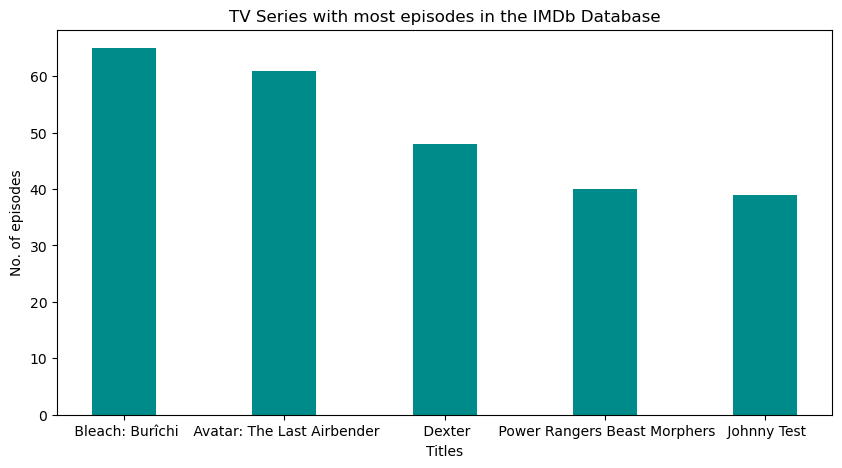

In [23]:
# TV Series with Most Episodes
shows = {}
for i, a in df['MEDIA'].items():
    if a == 'TV Series':
        if df.loc[i]['TITLE'] in shows: shows[df.loc[i]['TITLE']] += 1
        else: shows[df.loc[i]['TITLE']] = 1

shows = dict(sorted(shows.items(), key=lambda x:x[1], reverse=True))
title = list(shows.keys())[:5]
count = list(shows.values())[:5]

fig = plt.figure(figsize = (10, 5))
plt.bar(title, count, color ='darkcyan', width = 0.4)
 
plt.xlabel("Titles")
plt.ylabel("No. of episodes")
plt.title("TV Series with most episodes in the IMDb Database")
plt.show()

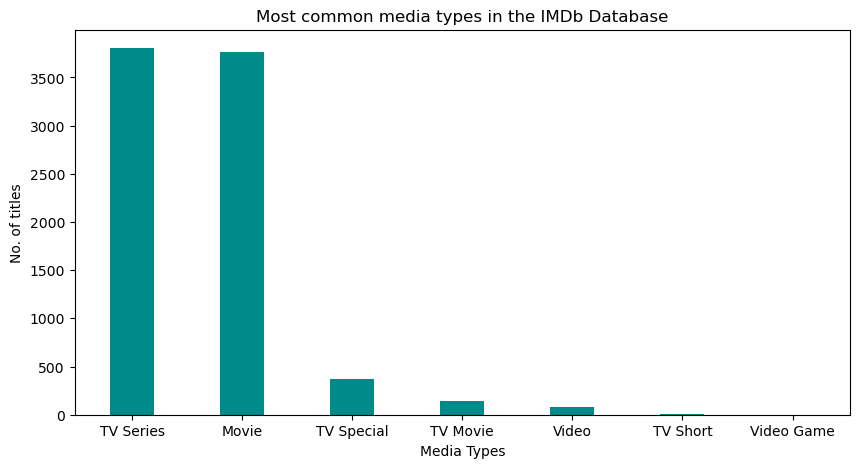

In [24]:
# Most common media types
media = df['MEDIA'].value_counts().reset_index()
mediaTypeList = media['index'].tolist()
mediaTypeCount = media['MEDIA'].tolist()

fig = plt.figure(figsize = (10, 5))
plt.bar(mediaTypeList, mediaTypeCount, color ='darkcyan', width = 0.4)
 
plt.xlabel("Media Types")
plt.ylabel("No. of titles")
plt.title("Most common media types in the IMDb Database")
plt.show()

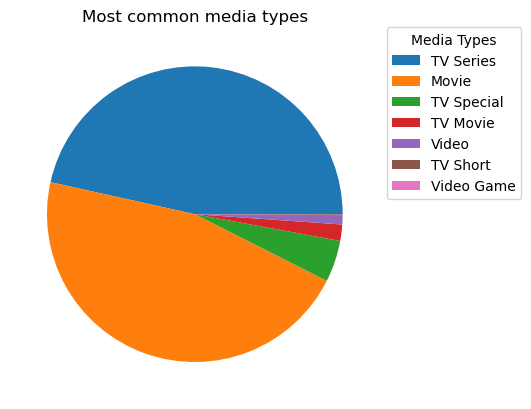

In [25]:
plt.pie(mediaTypeCount, labels=mediaTypeList, labeldistance=None)
plt.title("Most common media types")
plt.legend(bbox_to_anchor=(1,1.025), title="Media Types", loc='upper left')
plt.show()

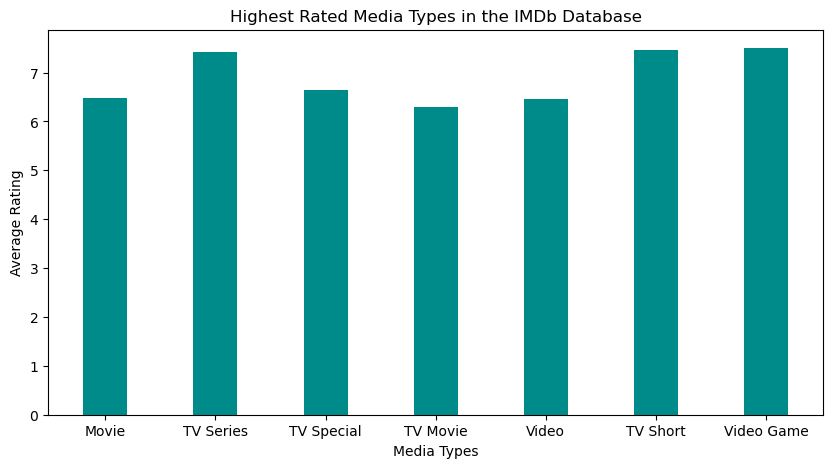

In [26]:
# Highest Rated Form of Media
totalMediaRating = {}
avgMediaRating = {}
for i, a in df['MEDIA'].items():
    if a in totalMediaRating: totalMediaRating[df.loc[i]['MEDIA']] += df.loc[i]['RATING']
    else: totalMediaRating[df.loc[i]['MEDIA']] = df.loc[i]['RATING']
for i in totalMediaRating.keys():
    avgMediaRating[i] = totalMediaRating[i]/(mediaTypeCount[mediaTypeList.index(i)])

avgMediaTypeList = list(avgMediaRating.keys())
avgMediaRatingList = list(avgMediaRating.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(avgMediaTypeList, avgMediaRatingList, color ='darkcyan', width = 0.4)
 
plt.xlabel("Media Types")
plt.ylabel("Average Rating")
plt.title("Highest Rated Media Types in the IMDb Database")
plt.show()

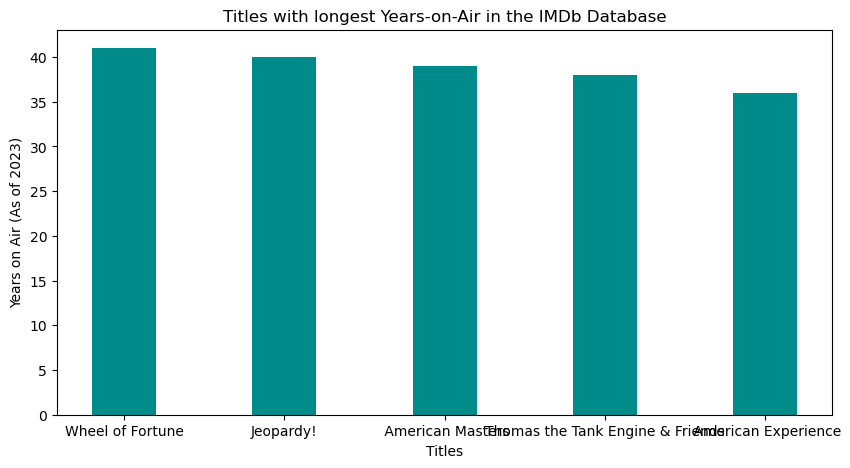

In [27]:
# Longest Running Titles
altDf = pd.DataFrame(df['TITLE'])
altDf['MEDIA'] = df['MEDIA']
altDf['START-YEAR'] = df['START-YEAR']
altDf['END-YEAR'] = df['END-YEAR']
altDf['YEARS-ON-AIR'] = df['YEARS-ON-AIR']
altDf = altDf.sort_values(by='YEARS-ON-AIR', ascending=False).drop_duplicates(subset=['TITLE', 'MEDIA'], keep="last").reset_index(drop=True)

longestYOAList = altDf['TITLE'][:5].tolist()
longestYOATimeList = altDf['YEARS-ON-AIR'][:5].tolist()

fig = plt.figure(figsize = (10, 5))
plt.bar(longestYOAList, longestYOATimeList, color ='darkcyan', width = 0.4)
 
plt.xlabel("Titles")
plt.ylabel('Years on Air (As of 2023)')
plt.title('Titles with longest Years-on-Air in the IMDb Database')
plt.show()

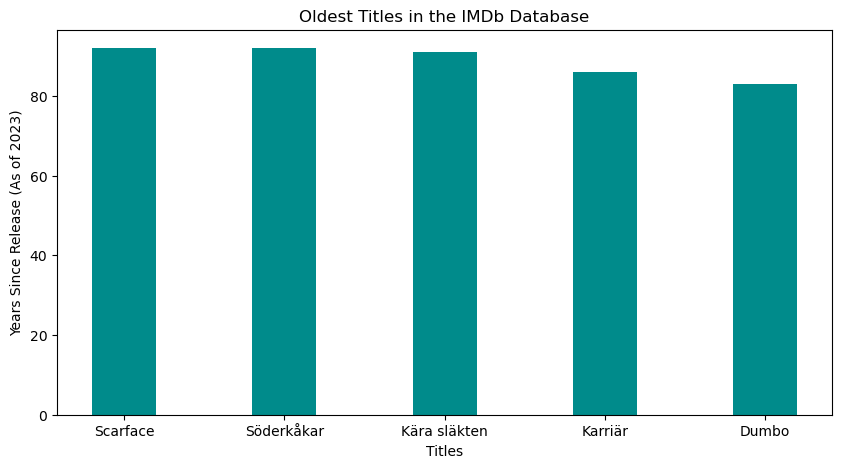

In [28]:
# Oldest Titles
altDf = altDf.sort_values('START-YEAR').reset_index(drop=True)

oldestTitlesList = altDf['TITLE'][:5].tolist()
oldestTitlesTimeList = altDf['START-YEAR'][:5].tolist()
for i in range(len(oldestTitlesTimeList)):
    oldestTitlesTimeList[i] = 2023 - int(oldestTitlesTimeList[i]) + 1

fig = plt.figure(figsize = (10, 5))
plt.bar(oldestTitlesList, oldestTitlesTimeList, color ='darkcyan', width = 0.4)
 
plt.xlabel("Titles")
plt.ylabel('Years Since Release (As of 2023)')
plt.title('Oldest Titles in the IMDb Database')
plt.show()

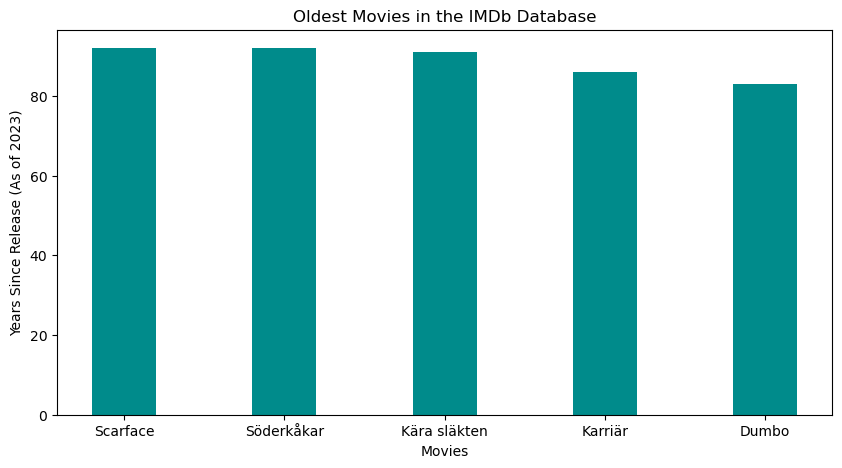

In [29]:
# Oldest Movies
x = 0
oldestMoviesList = []
oldestMoviesTimeList = []
for i, a in altDf['MEDIA'].items():
    if a == 'Movie':
        oldestMoviesList.append(altDf.loc[i]['TITLE'])
        oldestMoviesTimeList.append(altDf.loc[i]['START-YEAR'])
        x += 1
    if x == 5: break
for i in range(len(oldestMoviesTimeList)):
    oldestMoviesTimeList[i] = 2023 - int(oldestMoviesTimeList[i]) + 1

fig = plt.figure(figsize = (10, 5))
plt.bar(oldestMoviesList, oldestMoviesTimeList, color ='darkcyan', width = 0.4)
 
plt.xlabel("Movies")
plt.ylabel('Years Since Release (As of 2023)')
plt.title('Oldest Movies in the IMDb Database')
plt.show()

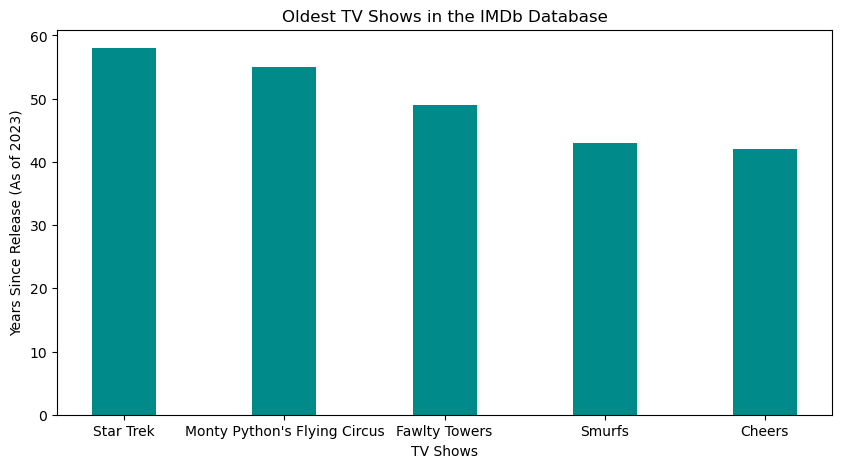

In [30]:
# Oldest TV Shows
x = 0
oldestSeriesList = []
oldestSeriesTimeList = []
for i, a in altDf['MEDIA'].items():
    if a == 'TV Series':
        oldestSeriesList.append(altDf.loc[i]['TITLE'])
        oldestSeriesTimeList.append(altDf.loc[i]['START-YEAR'])
        x += 1
    if x == 5: break
for i in range(len(oldestSeriesTimeList)):
    oldestSeriesTimeList[i] = 2023 - int(oldestSeriesTimeList[i]) + 1

fig = plt.figure(figsize = (10, 5))
plt.bar(oldestSeriesList, oldestSeriesTimeList, color ='darkcyan', width = 0.4)
 
plt.xlabel("TV Shows")
plt.ylabel('Years Since Release (As of 2023)')
plt.title('Oldest TV Shows in the IMDb Database')
plt.show()

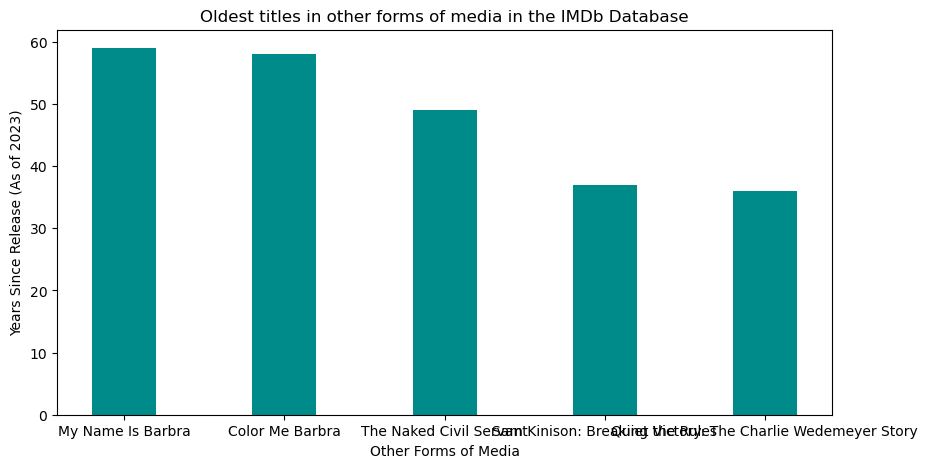

In [31]:
# Oldest Other Media
x = 0
oldestOtherList = []
oldestOtherTimeList = []
for i, a in altDf['MEDIA'].items():
    if a != 'Movie' and a != 'TV Series':
        oldestOtherList.append(altDf.loc[i]['TITLE'])
        oldestOtherTimeList.append(altDf.loc[i]['START-YEAR'])
        x += 1
    if x == 5: break
for i in range(len(oldestOtherTimeList)):
    oldestOtherTimeList[i] = 2023 - int(oldestOtherTimeList[i]) + 1

fig = plt.figure(figsize = (10, 5))
plt.bar(oldestOtherList, oldestOtherTimeList, color ='darkcyan', width = 0.4)
 
plt.xlabel("Other Forms of Media")
plt.ylabel('Years Since Release (As of 2023)')
plt.title('Oldest titles in other forms of media in the IMDb Database')
plt.show()

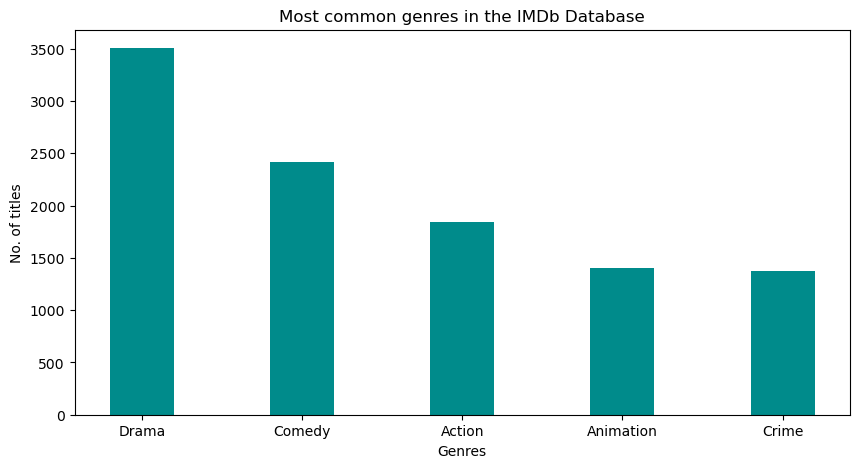

In [32]:
# Most common genres
genreCount = {}
for i, a in df['GENRE'].items():
    for j in range(len(a)):
        if a[j] in genreCount: genreCount[a[j]] += 1
        else: genreCount[a[j]] = 1
        
genreCount = dict(sorted(genreCount.items(), key=lambda x:x[1], reverse=True))
genre = list(genreCount.keys())[:5]
genreCountList = list(genreCount.values())[:5]

fig = plt.figure(figsize = (10, 5))
plt.bar(genre, genreCountList, color ='darkcyan', width = 0.4)
 
plt.xlabel("Genres")
plt.ylabel("No. of titles")
plt.title("Most common genres in the IMDb Database")
plt.show()

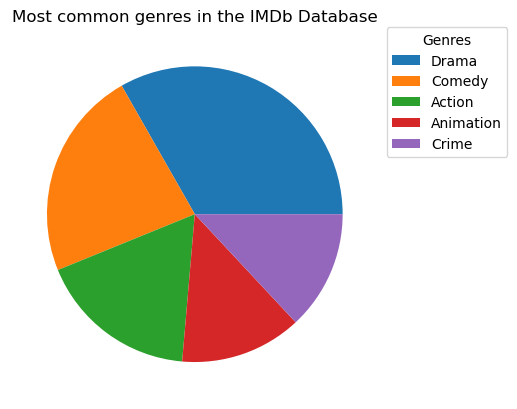

In [33]:
plt.pie(genreCountList, labels=genre, labeldistance=None)
plt.title("Most common genres in the IMDb Database")
plt.legend(bbox_to_anchor=(1,1.025), title="Genres", loc='upper left')
plt.show()

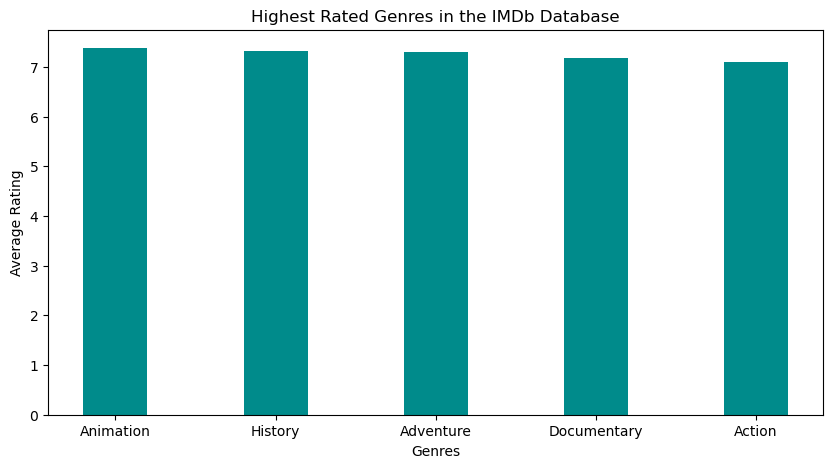

In [34]:
# Highest Rated Genres
totalGenreRating = {}
avgGenreRating = {}
for i, a in df['GENRE'].items():
    for j in range(len(a)):
        if a[j] in totalGenreRating: totalGenreRating[a[j]] += df.loc[i]['RATING']
        else: totalGenreRating[a[j]] = df.loc[i]['RATING']
for i in totalGenreRating.keys():
    avgGenreRating[i] = totalGenreRating[i]/genreCount[i]
    
avgGenreRating = dict(sorted(avgGenreRating.items(), key=lambda x:x[1], reverse=True))
avgGenreTypeList = list(avgGenreRating.keys())[:5]
avgGenreRatingList = list(avgGenreRating.values())[:5]

fig = plt.figure(figsize = (10, 5))
plt.bar(avgGenreTypeList, avgGenreRatingList, color ='darkcyan', width = 0.4)
 
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.title("Highest Rated Genres in the IMDb Database")
plt.show()

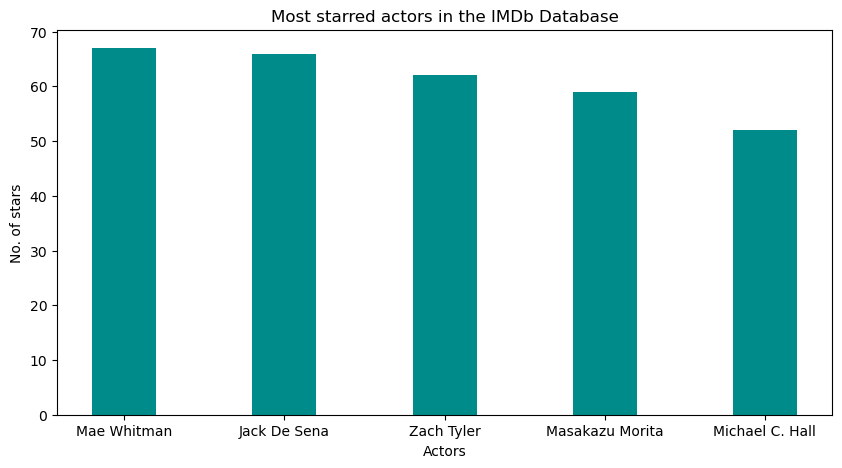

In [35]:
# Most Starred Actors
starredActors = {}
for i, a in df['STARS'].items():
    for j in range(len(a)):
        if a[j] in starredActors: starredActors[a[j]] += 1
        else: starredActors[a[j]] = 1

starredActors = dict(sorted(starredActors.items(), key=lambda x:x[1], reverse=True))
mostStarredActorsList = list(starredActors.keys())[1:6]
mostStarredActorsCount = list(starredActors.values())[1:6]

fig = plt.figure(figsize = (10, 5))
plt.bar(mostStarredActorsList, mostStarredActorsCount, color ='darkcyan', width = 0.4)
 
plt.xlabel("Actors")
plt.ylabel("No. of stars")
plt.title("Most starred actors in the IMDb Database")
plt.show()

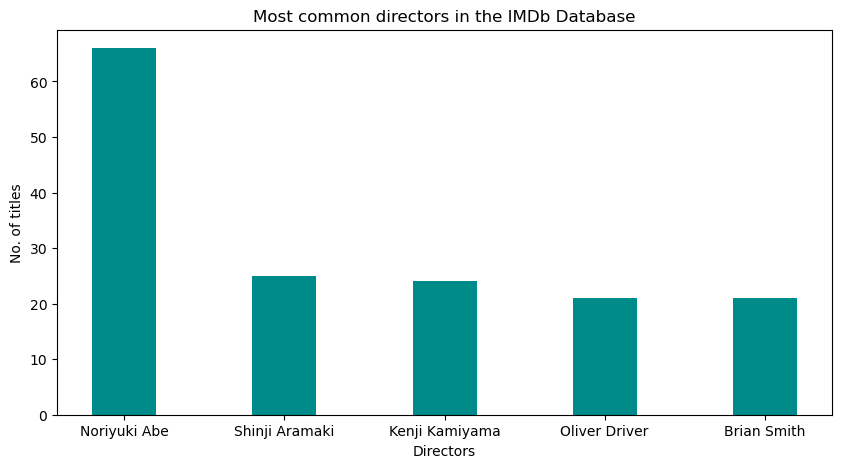

In [36]:
# Most Common Directors
directors = {}
for i, a in df['DIRECTORS'].items():
    for j in range(len(a)):
        if a[j] in directors: directors[a[j]] += 1
        else: directors[a[j]] = 1

directors = dict(sorted(directors.items(), key=lambda x:x[1], reverse=True))
mostCommonDirectorsList = list(directors.keys())[0:5]
mostCommonDirectorsCount = list(directors.values())[0:5]

fig = plt.figure(figsize = (10, 5))
plt.bar(mostCommonDirectorsList, mostCommonDirectorsCount, color ='darkcyan', width = 0.4)
 
plt.xlabel("Directors")
plt.ylabel("No. of titles")
plt.title("Most common directors in the IMDb Database")
plt.show()